
2a: Interpolation
Polynomgradtal: 11
Max |p1-p2|: 1.12e-04
Max |p1-p3|: 1.12e-04
Max |p2-p3|: 1.38e-10


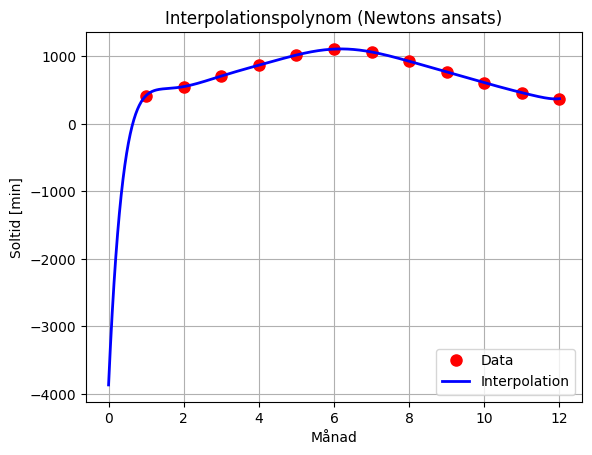

MSE: 0.00e+00

2c: Grad 2 (apr-aug)
MSE: 262.91


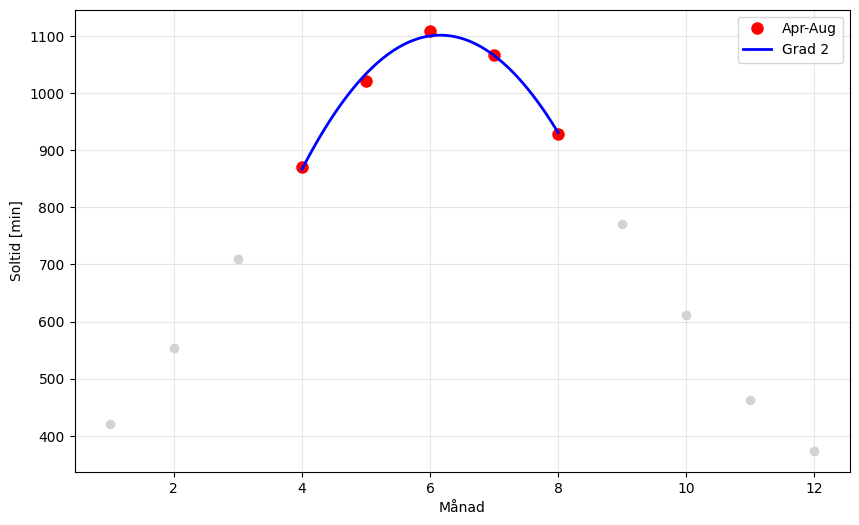


2d: Grad 3 (apr-aug)
MSE: 160.51


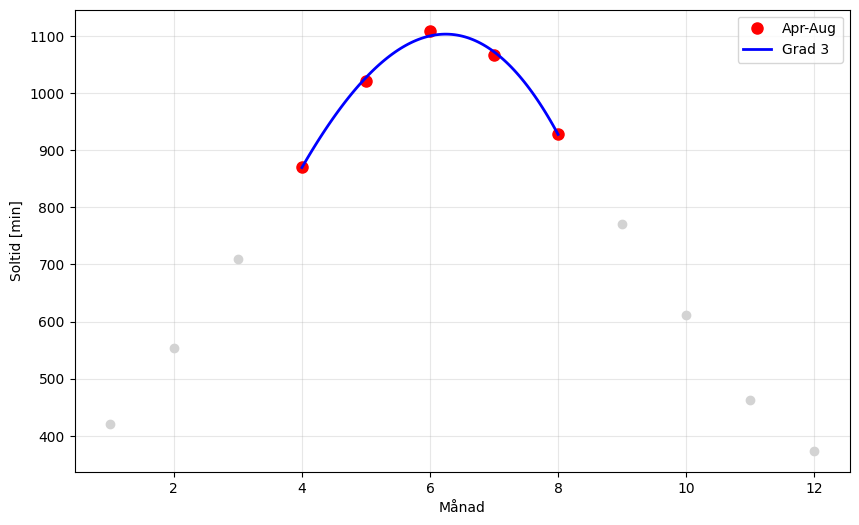


2e: Trigonometrisk
MSE: 1806.14


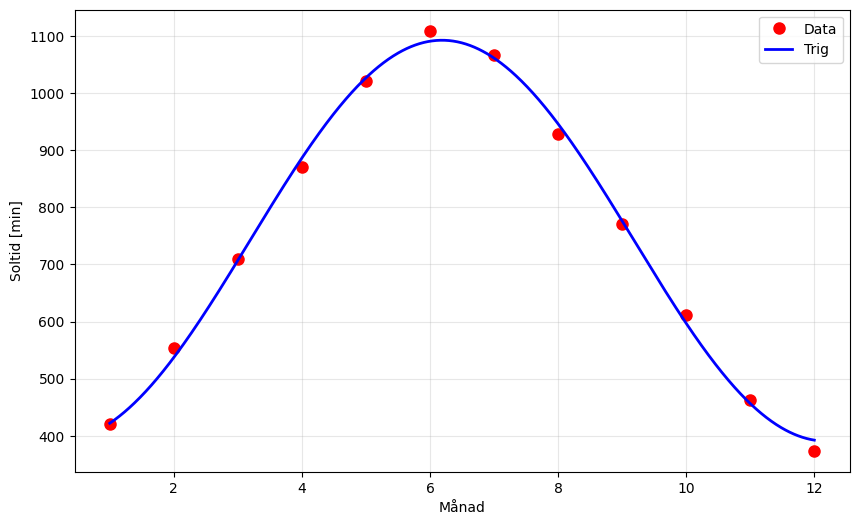

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def clear_console():
    os.system('clear')

t_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
soltid_data = np.array([421, 553, 709, 871, 1021, 1109, 1066, 929, 771, 612, 463, 374])

# minstakvadratfelet utanför i separat metod som går att återanvända i c-e)

def divided_differences(x, y): # För Newtons ansats i a)
    # Från py3.py
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def eval_newton(coef, x_data, x_eval): # Också för Newtons anstats i a)
    # Från py3.py
    n = len(coef)
    p = np.full_like(x_eval, coef[-1], dtype=float)
    for i in range(n-2, -1, -1):
        p = p * (x_eval - x_data[i]) + coef[i]
    return p

def uppgift2a(): # dela upp för 3 olika ansatserna
    print("\n2a: Interpolation") 
    
    # Naiv
    V1 = np.vander(t_data, increasing=True)
    c1 = np.linalg.solve(V1, soltid_data)
    
    # Centrerad
    t_mean = np.mean(t_data)
    V2 = np.vander(t_data - t_mean, increasing=True)
    c2 = np.linalg.solve(V2, soltid_data)
    
    # Newton
    c3 = divided_differences(t_data, soltid_data)
    
    # Evaluate polynomials
    t_eval = np.linspace(0, 12, 1000)
    
    # p1 naiv
    p1 = np.zeros_like(t_eval)
    for i in range(len(c1)):
        p1 += c1[i] * t_eval**i
    
    # p2 centrerad
    p2 = np.zeros_like(t_eval)
    for i in range(len(c2)):
        p2 += c2[i] * (t_eval - t_mean)**i
    
    # p3 Newton
    p3 = eval_newton(c3, t_data, t_eval)
    
    print(f"Polynomgradtal: {len(t_data)-1}")
    print(f"Max |p1-p2|: {np.max(np.abs(p1-p2)):.2e}")
    print(f"Max |p1-p3|: {np.max(np.abs(p1-p3)):.2e}")
    print(f"Max |p2-p3|: {np.max(np.abs(p2-p3)):.2e}")
    
    # Plot Newton
    fig, ax = plt.subplots()
    ax.plot(t_data, soltid_data, 'ro', markersize=8, label='Data')
    ax.plot(t_eval, p3, 'b-', linewidth=2, label='Interpolation')
    ax.set_xlabel('Månad')
    ax.set_ylabel('Soltid [min]')
    plt.title('Interpolationspolynom (Newtons ansats)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # MSE for verification
    r = np.zeros_like(t_data)
    for i in range(len(t_data)):
        r[i] = eval_newton(c3, t_data, np.array([t_data[i]]))[0] - soltid_data[i]
    mse = np.sum(r**2)
    print(f"MSE: {mse:.2e}")
    
    return V1, V2

""" def uppgift2b(V1, V2):
    print("\n2b: Konditionstal")
    
    # Newton matris
    n = len(t_data)
    V_newton = np.zeros((n, n))
    V_newton[:, 0] = 1
    for j in range(1, n):
        for i in range(j, n):
            V_newton[i, j] = V_newton[i, j-1] * (t_data[i] - t_data[j-1])
    
    print(f"Naiv:      {np.linalg.cond(V1, np.inf):.2e}")
    print(f"Centrerad: {np.linalg.cond(V2, np.inf):.2e}")
    print(f"Newton:    {np.linalg.cond(V_newton, np.inf):.2e}") """

def uppgift2c(): # Mindrakvadrat Grad 2
    print("\n2c: Grad 2 (apr-aug)")
    
    t_sub = t_data[3:8]
    y_sub = soltid_data[3:8]
    
    # Från py3.py - minstakvadrat
    A = np.vander(t_sub, 3, increasing=True)
    c = np.linalg.lstsq(A, y_sub, rcond=None)[0]
    
    mse = np.sum((A @ c - y_sub)**2)
    print(f"MSE: {mse:.2f}")
    
    t_plot = np.linspace(4, 8, 100)
    p_plot = np.polyval(c[::-1], t_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_data, soltid_data, 'o', color='lightgray')
    plt.plot(t_sub, y_sub, 'ro', markersize=8, label='Apr-Aug')
    plt.plot(t_plot, p_plot, 'b-', linewidth=2, label='Grad 2')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [min]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return A

def uppgift2d(): # Minstrakvadrat Grad 3
    print("\n2d: Grad 3 (apr-aug)")
    
    t_sub = t_data[3:8]
    y_sub = soltid_data[3:8]
    
    A = np.vander(t_sub, 4, increasing=True)
    c = np.linalg.lstsq(A, y_sub, rcond=None)[0]
    
    mse = np.sum((A @ c - y_sub)**2)
    print(f"MSE: {mse:.2f}")
    
    t_plot = np.linspace(4, 8, 100)
    p_plot = np.polyval(c[::-1], t_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_data, soltid_data, 'o', color='lightgray')
    plt.plot(t_sub, y_sub, 'ro', markersize=8, label='Apr-Aug')
    plt.plot(t_plot, p_plot, 'b-', linewidth=2, label='Grad 3')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [min]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return A

def uppgift2e(): # Minstakvadrat Trig
    print("\n2e: Trigonometrisk")
    
    omega = 2*np.pi/12
    # Från py3.py
    A_trig = np.column_stack([
        np.ones(len(t_data)),
        np.cos(omega * t_data),
        np.sin(omega * t_data)
    ])
    
    d = np.linalg.lstsq(A_trig, soltid_data, rcond=None)[0]
    
    mse = np.sum((A_trig @ d - soltid_data)**2)
    print(f"MSE: {mse:.2f}")
    
    t_plot = np.linspace(1, 12, 1000)
    p_trig = d[0] + d[1]*np.cos(omega*t_plot) + d[2]*np.sin(omega*t_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_data, soltid_data, 'ro', markersize=8, label='Data')
    plt.plot(t_plot, p_trig, 'b-', linewidth=2, label='Trig')
    plt.xlabel('Månad')
    plt.ylabel('Soltid [min]')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return A_trig

""" def uppgift2f(A_quad, A_cubic, A_trig):
    print("\n2f: Konditionstal normalekvationer")
    
    print(f"Grad 2: {np.linalg.cond(A_quad.T @ A_quad, np.inf):.2e}")
    print(f"Grad 3: {np.linalg.cond(A_cubic.T @ A_cubic, np.inf):.2e}")
    print(f"Trig:   {np.linalg.cond(A_trig.T @ A_trig, np.inf):.2e}")"""

def main():
    clear_console()
    V1, V2 = uppgift2a()
    # uppgift2b(V1, V2)
    A_quad = uppgift2c()
    A_cubic = uppgift2d()
    A_trig = uppgift2e()
    # uppgift2f(A_quad, A_cubic, A_trig)
    
if __name__ == "__main__":
    main() 